In [1]:
import json
import math
import numpy as np

In [2]:
with open('../resultFiles/results_lab_7.json', 'r') as f:
    
    data = json.loads(f.read())

In [3]:
#iterate through all combinations and compute min, max, avg for f
for algorithm in data["algorithm"]:
    
    kroa = []
    krob = []
    
    for instance in algorithm["instance"]:
        
        f_meta = np.array(instance["f"], dtype=float)
        f_meta_avg = np.average(f_meta)
        f_meta_avg = int(f_meta_avg * 100) / 100
        f_meta_min = np.min(f_meta).astype(int)
        f_meta_max = np.max(f_meta).astype(int)
        f_std = np.std(f_meta)
        f_std = int(f_std * 100) / 100
        
        if instance["name"] == "kroA100":
            kroa += [str(f_meta_avg),str(f_std), str(f_meta_min), str(f_meta_max)]
        else:
            krob += [str(f_meta_avg),str(f_std), str(f_meta_min), str(f_meta_max)]
        
    out = [algorithm["type_meta"], algorithm["type"],algorithm["neighbourhood"]] + kroa + krob
    print(';'.join(out))


HEAcyc_exp_20_1_1;random;edges;30563.7;216.74;30251;30922;30590.7;480.89;30059;31823
HEAcyc_exp_10_1_2;random;edges;30827.7;501.27;30460;32225;31385.2;636.15;30191;32225
HEAcyc_exp_40_1_1;random;edges;30274.4;252.61;29871;30606;30316.4;186.6;29916;30645
large_scale_neighborhood_40;random;edges;32599.0;344.49;31995;33179;33445.6;300.36;32808;33879
small_perturbation_8;random;edges;35131.5;943.55;33605;36838;35324.8;977.8;33486;36910


In [4]:
#iterate through all combinations and compute min, max, avg for f
for algorithm in data["algorithm"]:
    
    kroa = []
    krob = []
    
    for instance in algorithm["instance"]:
        
        t_meta = np.array(instance["t_meta"], dtype=float)
        t_meta_avg = np.average(t_meta)
        t_meta_avg = int(t_meta_avg * 100) / 100
        t_meta_min = np.min(t_meta).astype(int)
        t_meta_max = np.max(t_meta).astype(int)
        t_std = np.std(t_meta)
        t_std = int(t_std * 100) / 100
        
        if instance["name"] == "kroA100":
            kroa += [str(t_meta_avg), str(t_std), str(t_meta_min), str(t_meta_max)]
        else:
            krob += [str(t_meta_avg), str(t_std), str(t_meta_min), str(t_meta_max)]
        
    out = [algorithm["type_meta"], algorithm["type"],algorithm["neighbourhood"]] + kroa + krob
    print(';'.join(out))

HEAcyc_exp_20_1_1;random;edges;81147.0;183.71;81005;81557;81147.3;159.07;81031;81474
HEAcyc_exp_10_1_2;random;edges;81084.6;34.22;81010;81130;81100.89;98.7;81010;81305
HEAcyc_exp_40_1_1;random;edges;81314.8;348.14;81016;82122;81369.1;325.05;81018;81984
large_scale_neighborhood_40;random;edges;60006.7;2.68;60003;60010;60006.8;3.73;60001;60012
small_perturbation_8;random;edges;60017.3;14.29;60000;60039;60028.7;18.93;60000;60057


In [5]:
with open('../resultFiles/results_lab_6_cp.json', 'r') as f:
    
    datalab6 = json.loads(f.read())

In [6]:
configs = {}
for type_start in datalab6:
    for corr_type in datalab6[type_start]:
        for t in datalab6[type_start][corr_type]:
            s = datalab6[type_start][corr_type][t]
            a = np.concatenate([np.array(s["data"]), np.reshape(s["to_best"], (len(s["to_best"]), 1))], axis=1)
            configs[type_start + "_" + corr_type + "_" + t + "_avg"] = a[:,[0, 1]]
            configs[type_start + "_" + corr_type + "_" + t + "_to_best"] = a[:,[0, 2]]

cyc_exp_edges_kroA200_avg


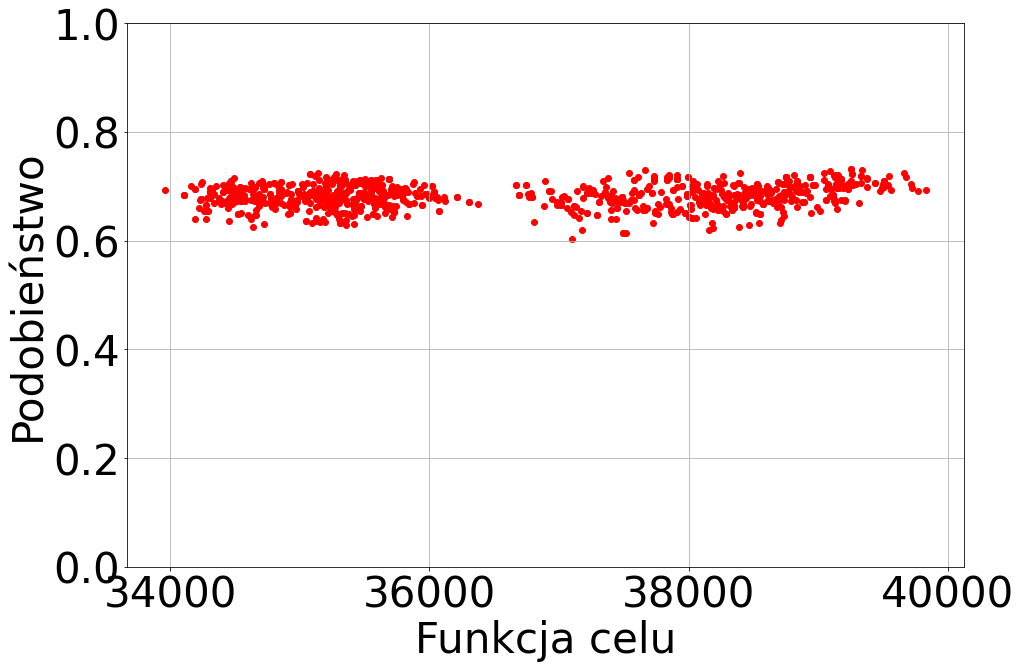

cyc_exp_edges_kroA200_to_best


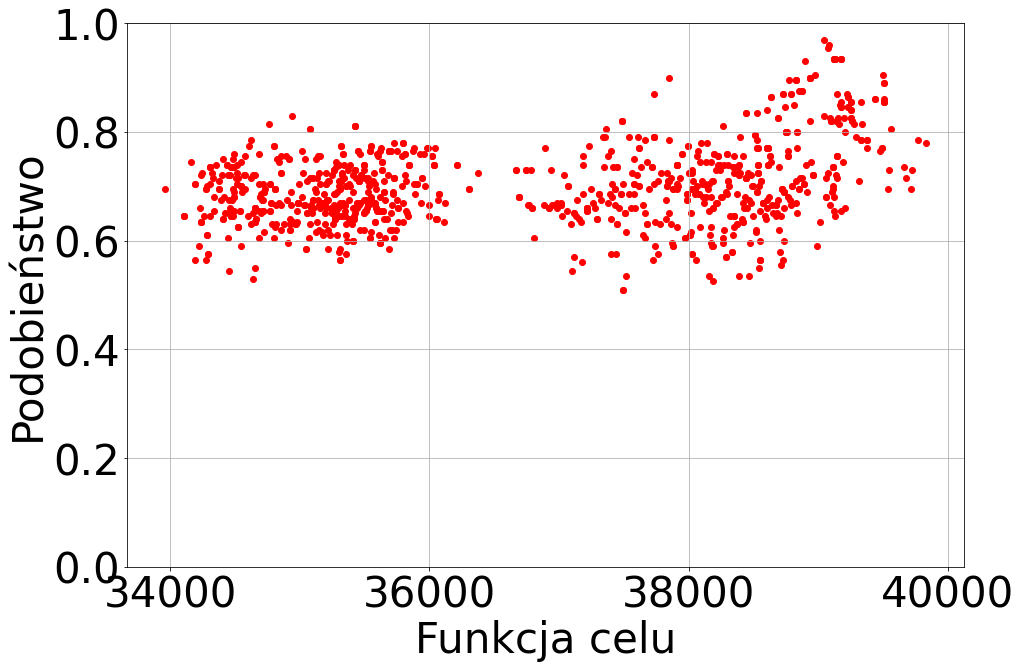

cyc_exp_edges_kroB200_avg


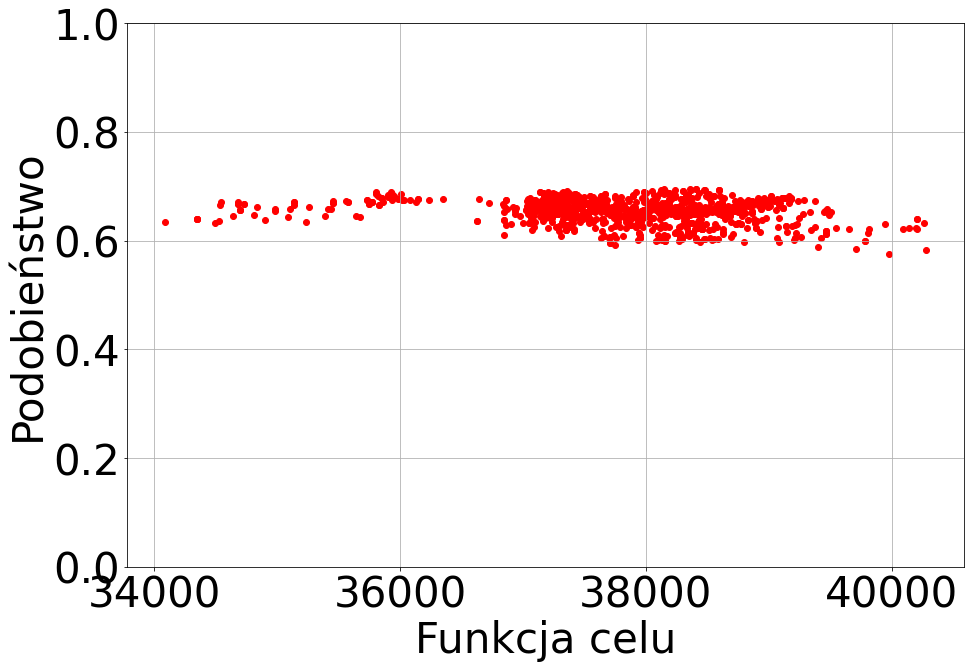

cyc_exp_edges_kroB200_to_best


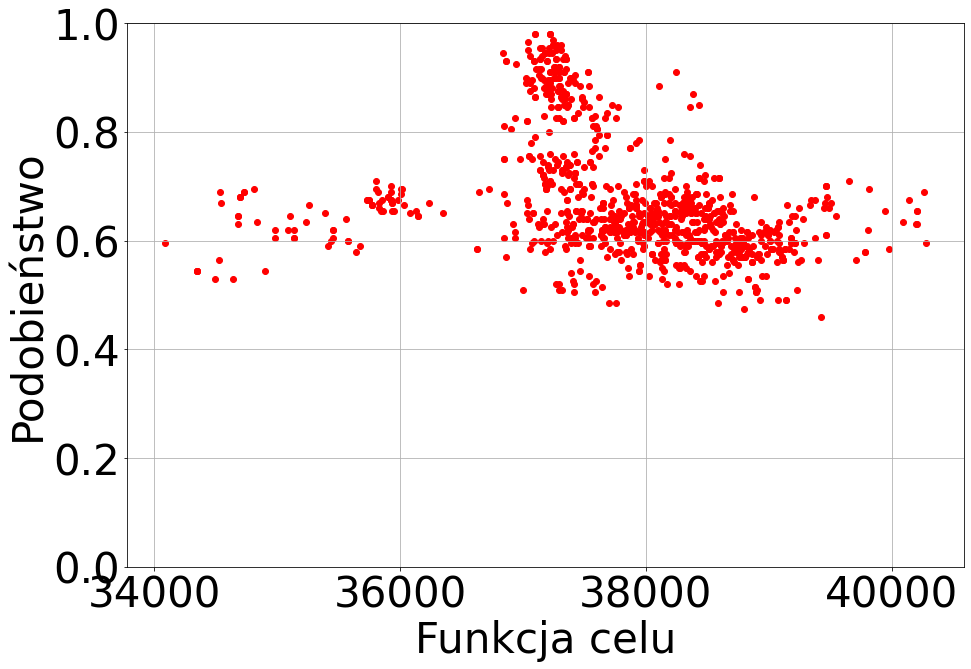

cyc_exp_vertices_kroA200_avg


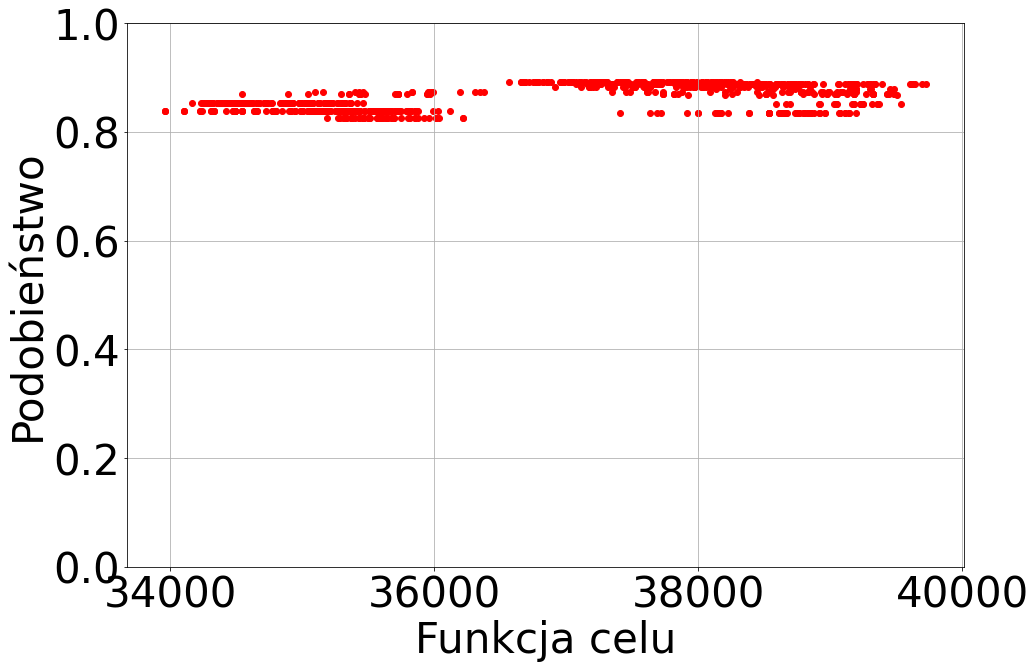

cyc_exp_vertices_kroA200_to_best


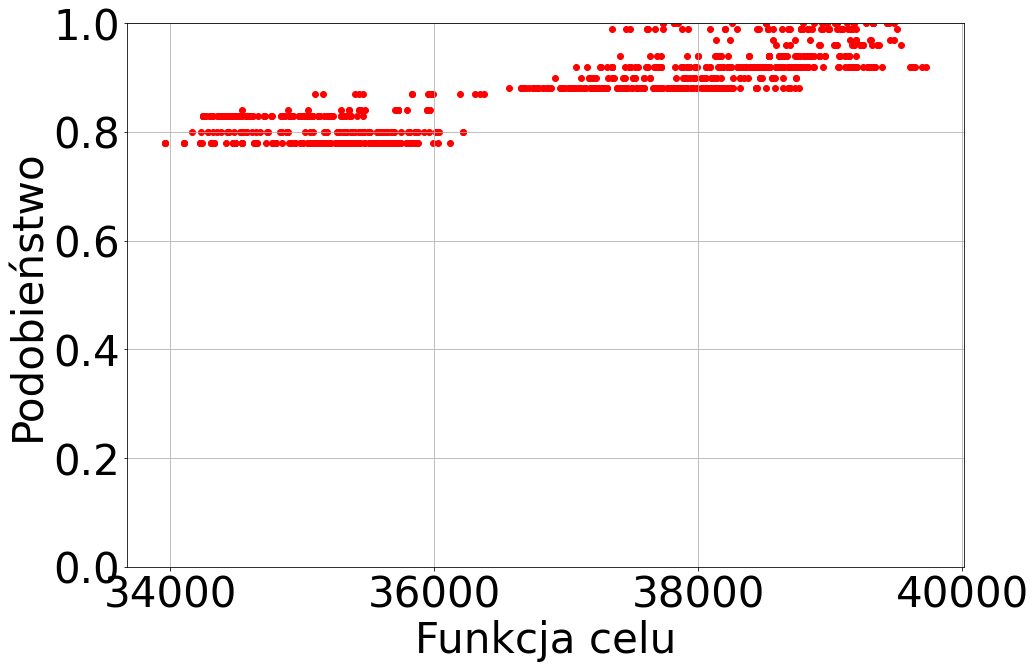

cyc_exp_vertices_kroB200_avg


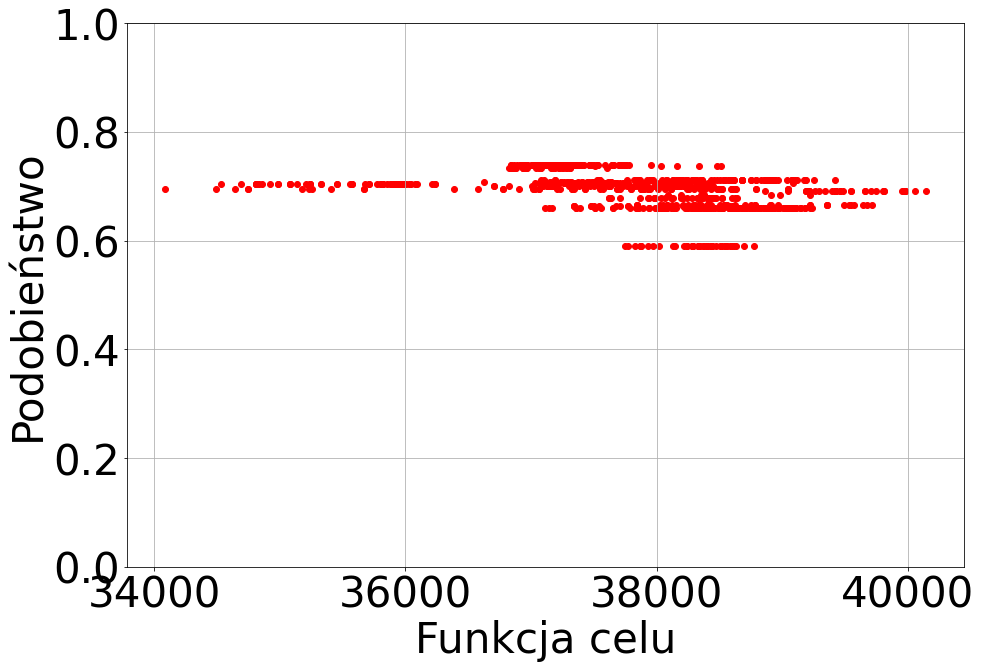

cyc_exp_vertices_kroB200_to_best


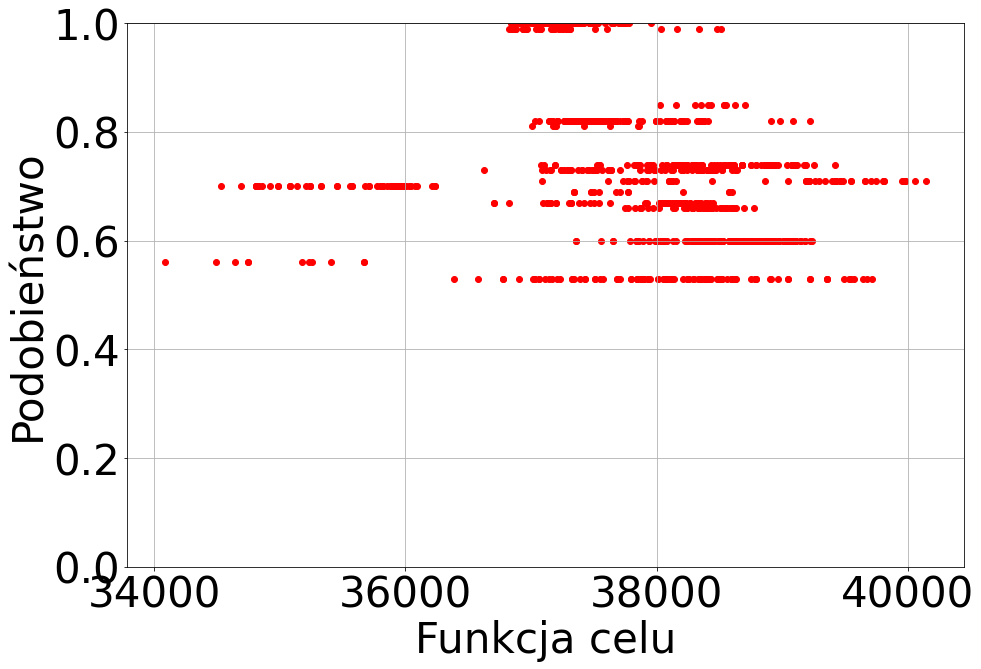

greedy_edges_kroA200_avg


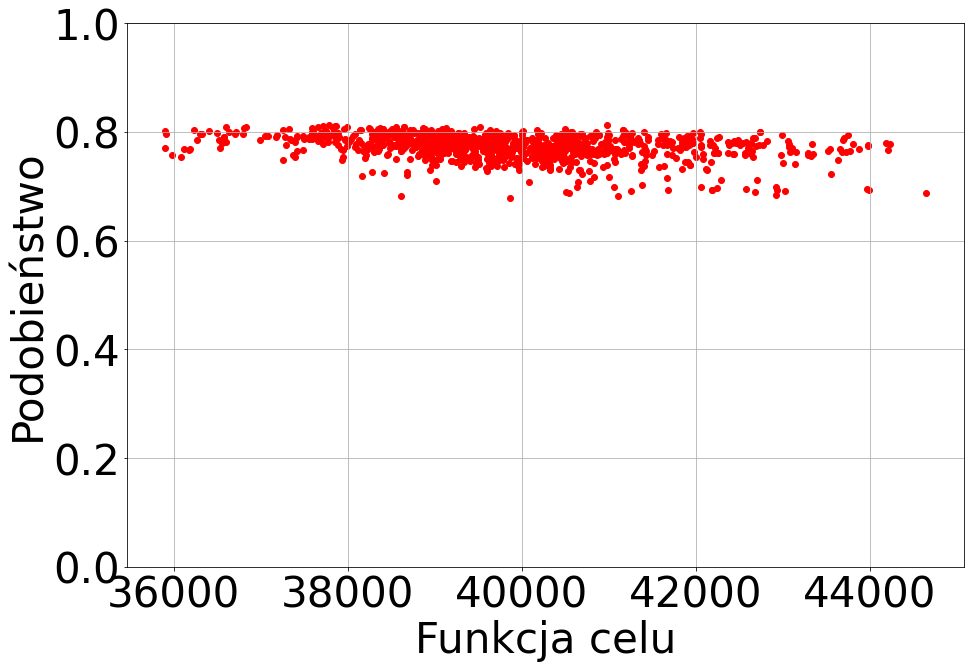

greedy_edges_kroA200_to_best


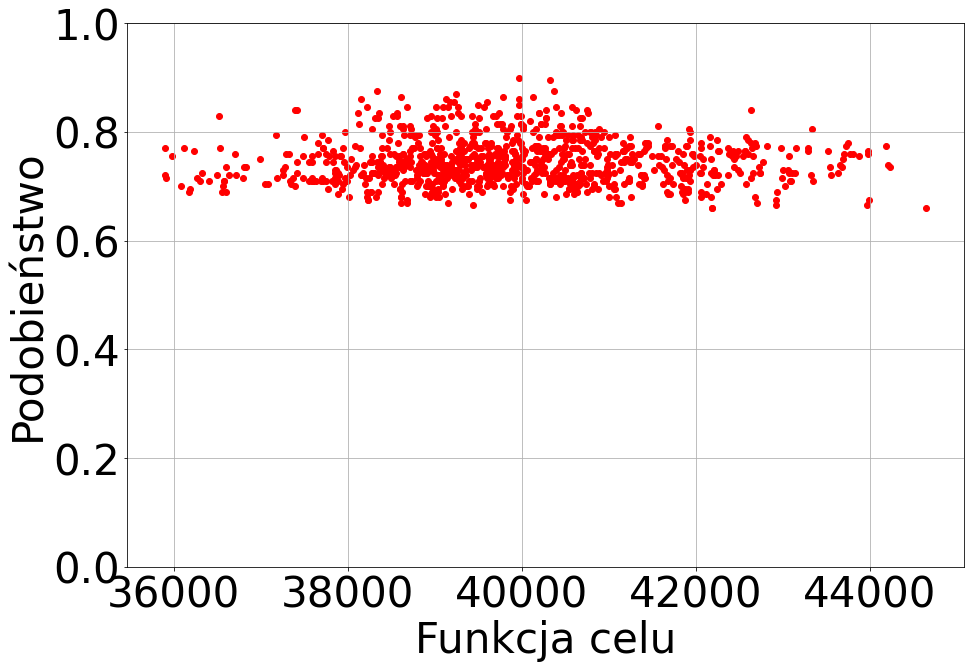

greedy_edges_kroB200_avg


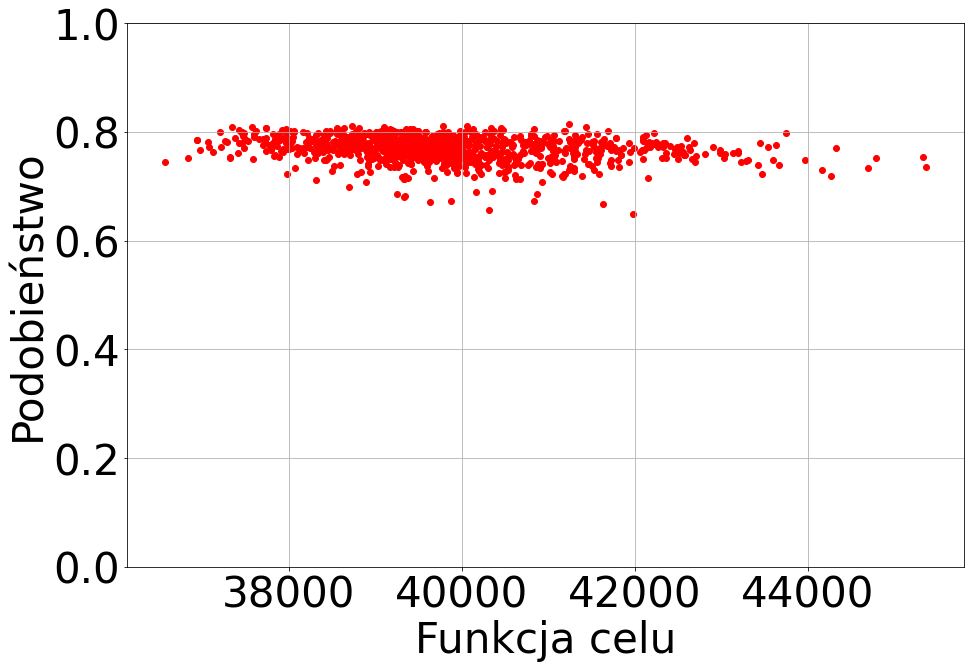

greedy_edges_kroB200_to_best


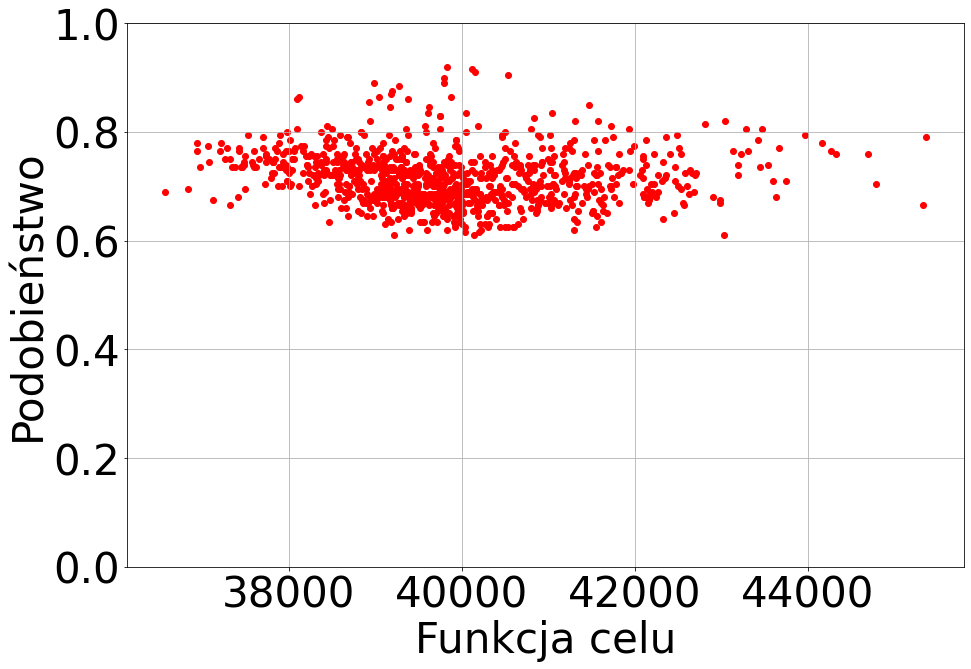

greedy_vertices_kroA200_avg


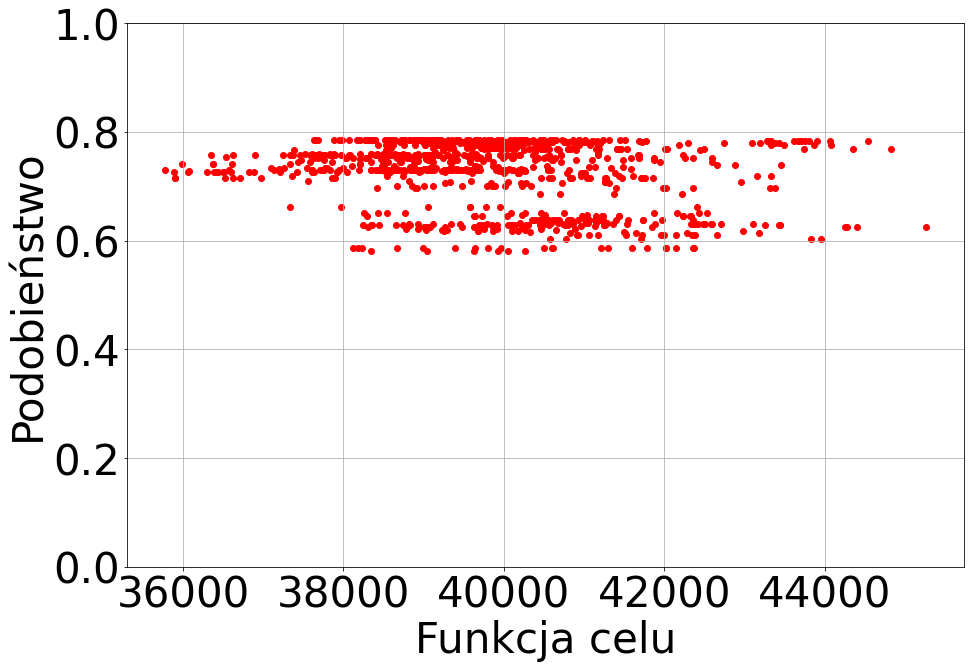

greedy_vertices_kroA200_to_best


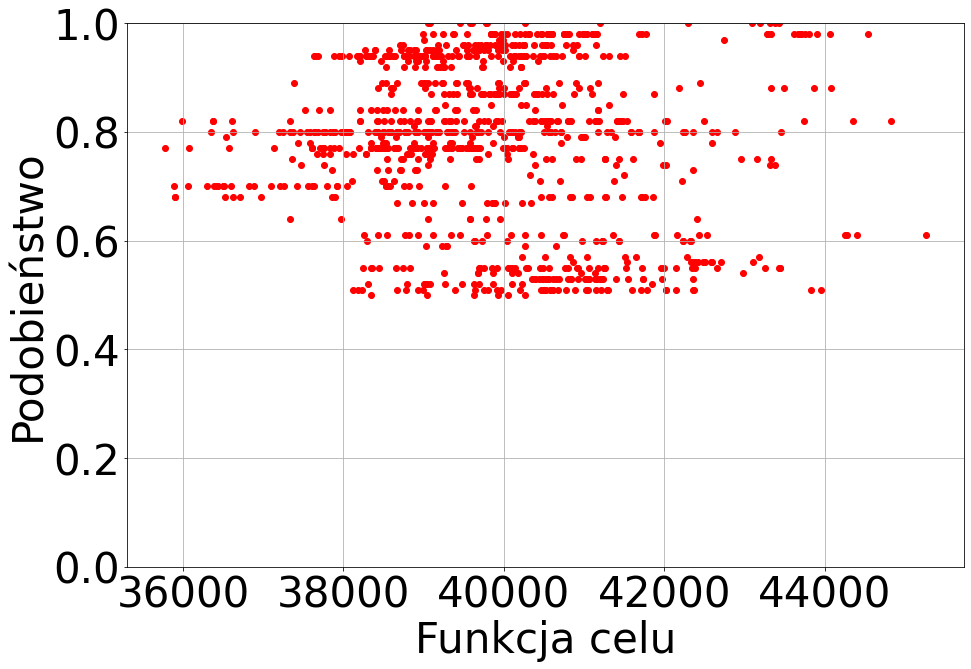

greedy_vertices_kroB200_avg


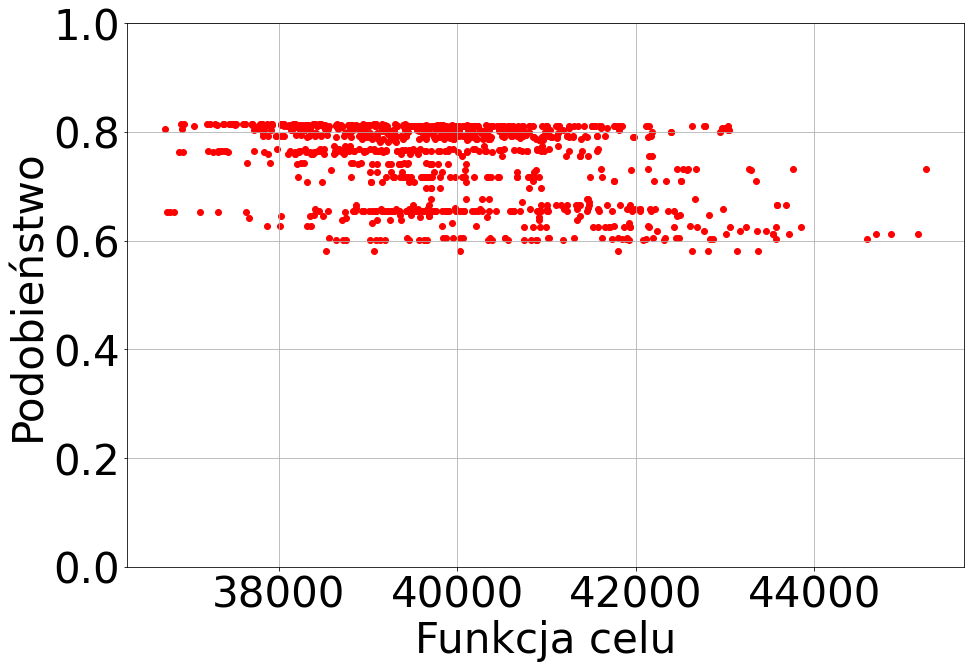

greedy_vertices_kroB200_to_best


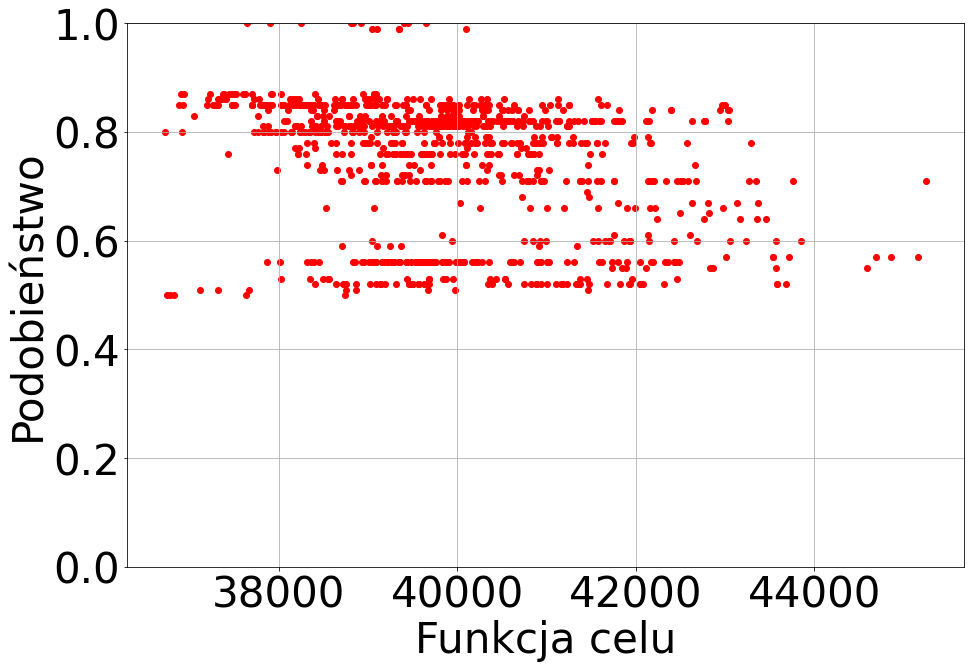

lp_edges_kroA200_avg


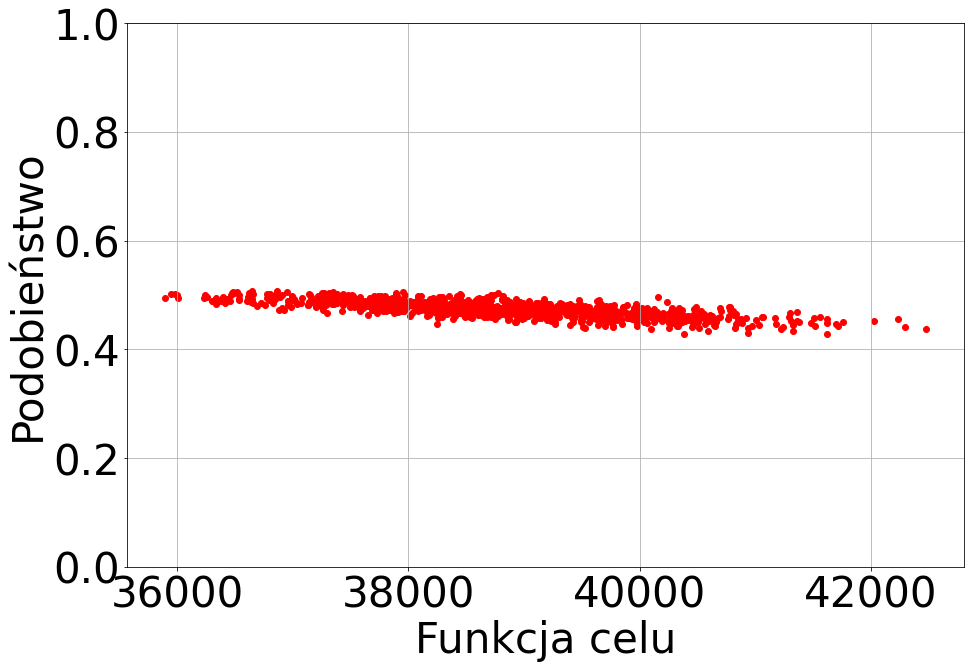

lp_edges_kroA200_to_best


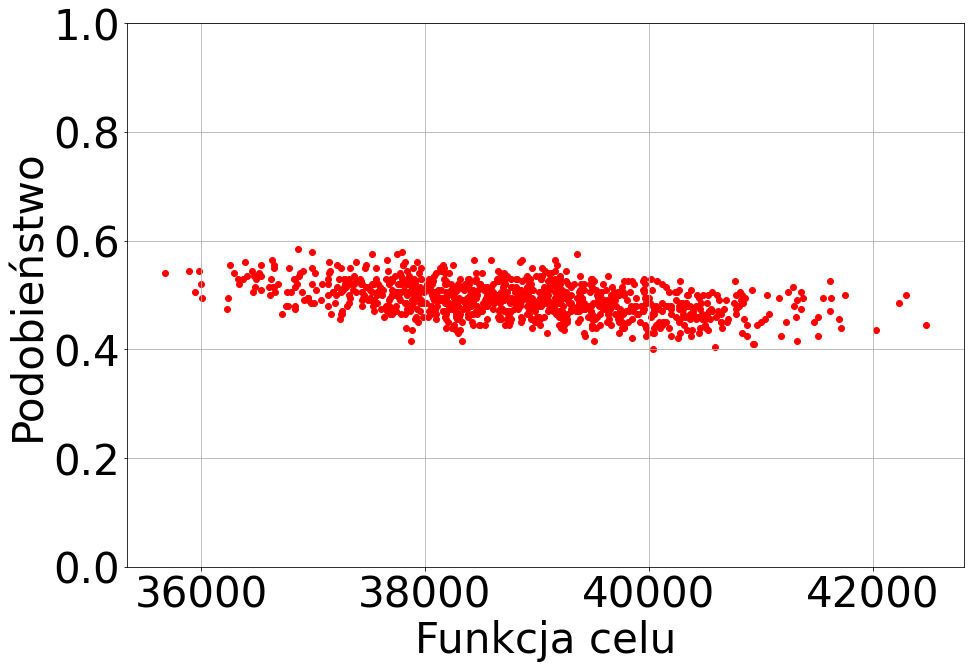

lp_edges_kroB200_avg


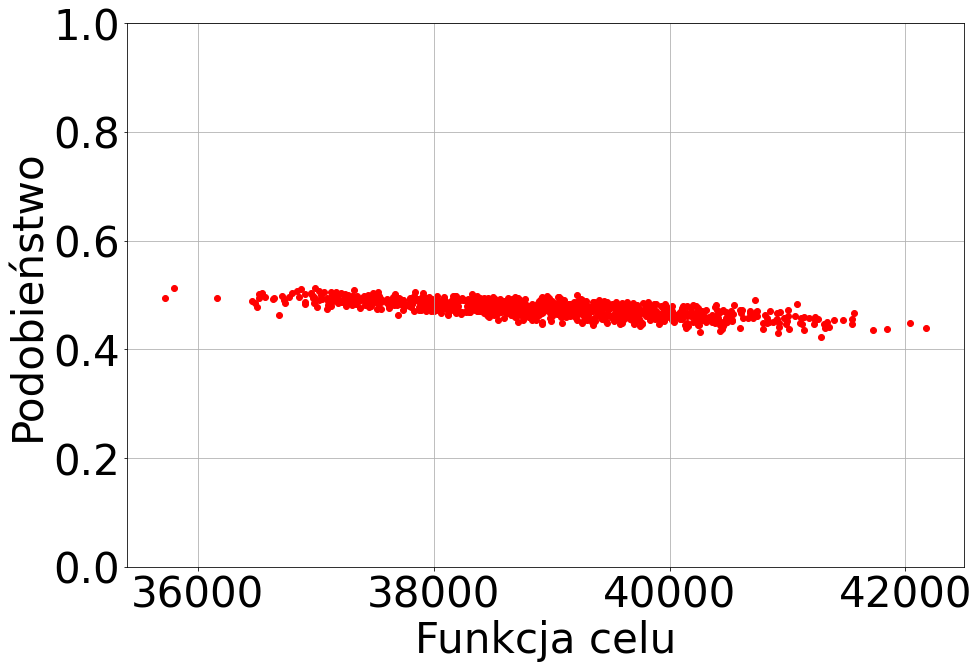

lp_edges_kroB200_to_best


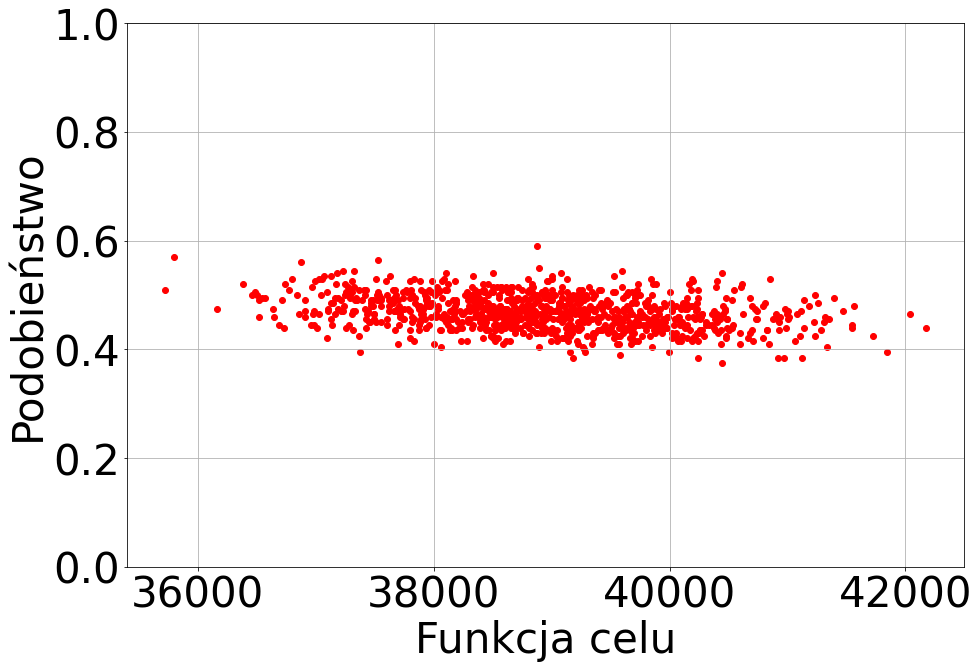

lp_vertices_kroA200_avg


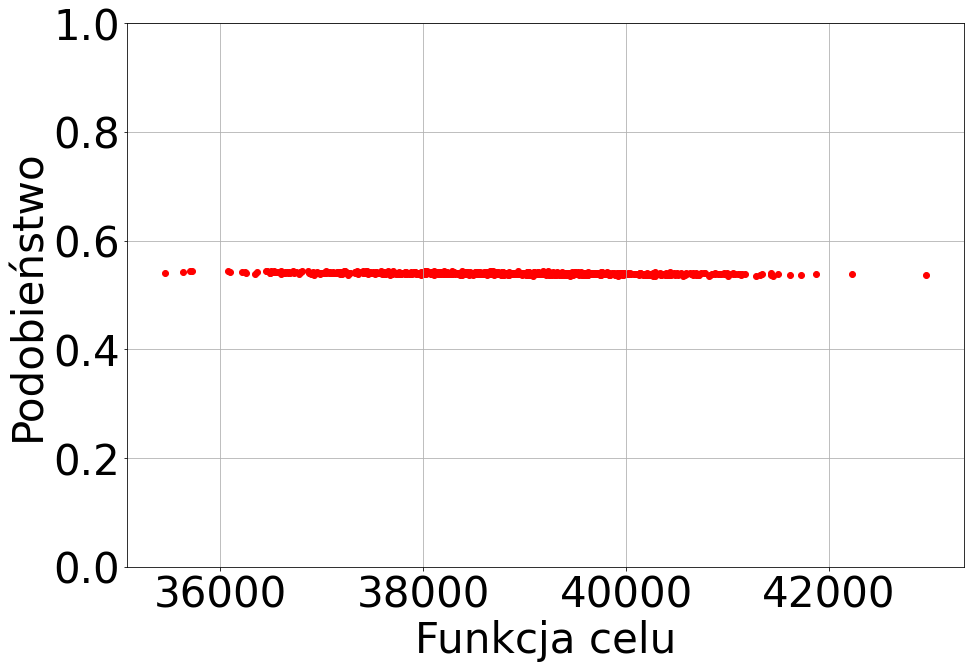

lp_vertices_kroA200_to_best


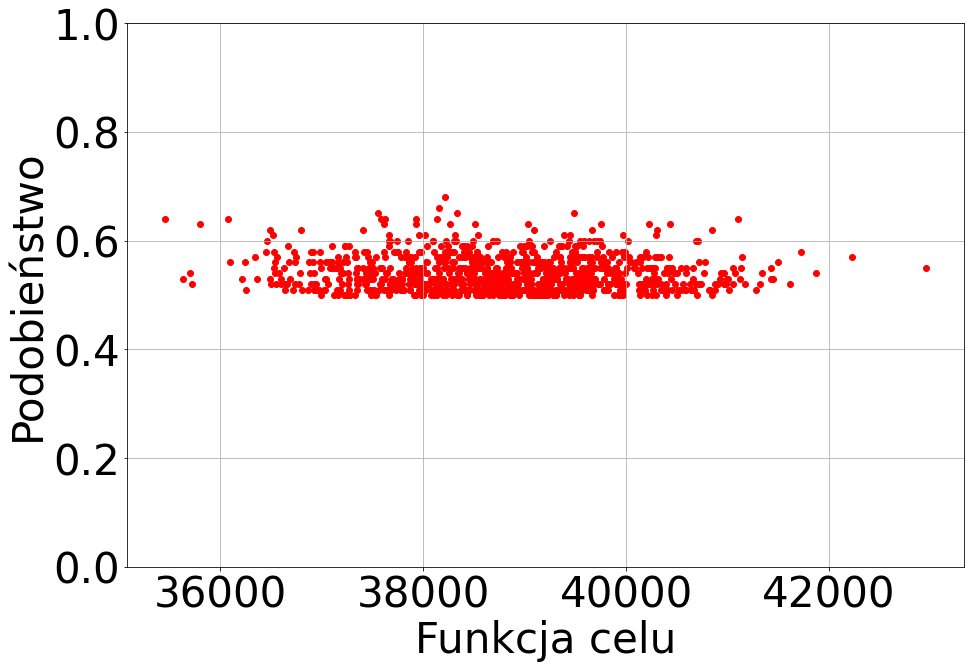

lp_vertices_kroB200_avg


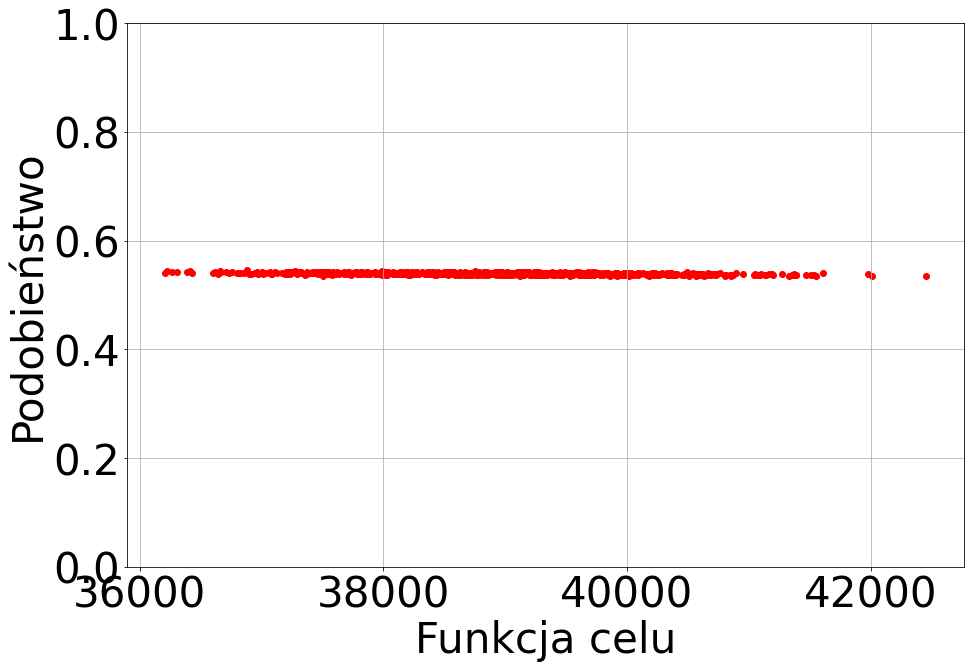

lp_vertices_kroB200_to_best


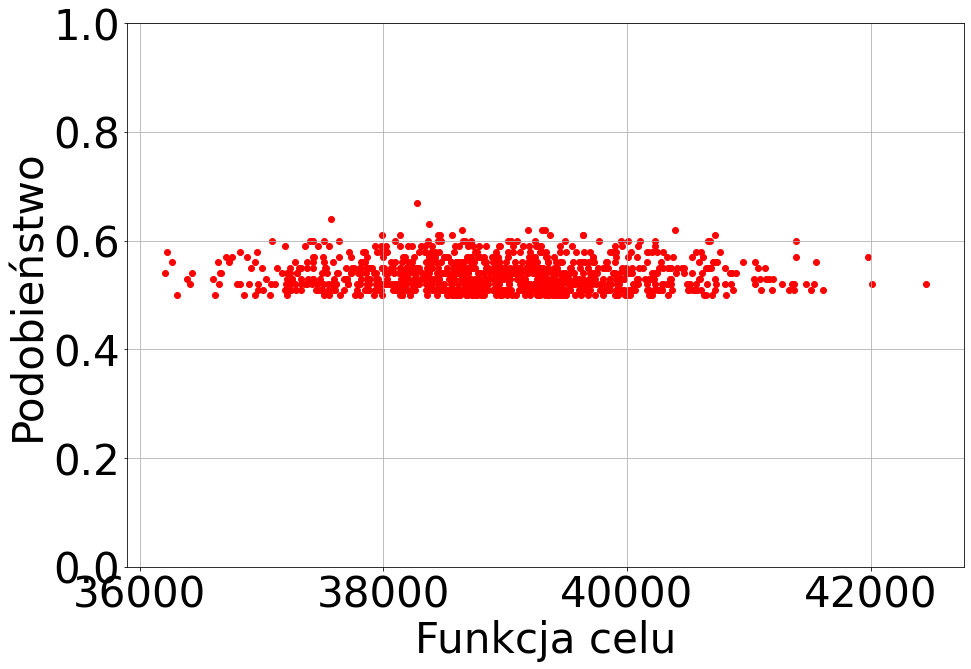

In [7]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 42})

for c in configs:
    print(c)
    data = np.delete(configs[c], np.argmax(configs[c][:,1]), axis=0)
    fig = plt.figure(figsize=(15, 10))
    plt.scatter(x=data[:,0], y=data[:,1], color='r')
    plt.ylabel("Podobieństwo")
    plt.xlabel("Funkcja celu")
    plt.grid()
    plt.ylim([0,1])
    plt.savefig(c)
    plt.show()